**Synthetic Data Generation Using Bayesian Method Based on Distribution**

**1. Import Dataset**

In [1]:
#Download dataset from: https://drive.google.com/file/d/11eUj_VLqcbMjEAN75-kcbwFN5-zu0Az8/view?usp=sharing

!gdown 11eUj_VLqcbMjEAN75-kcbwFN5-zu0Az8

Downloading...
From: https://drive.google.com/uc?id=11eUj_VLqcbMjEAN75-kcbwFN5-zu0Az8
To: /content/database2.txt
100% 1.90M/1.90M [00:00<00:00, 186MB/s]


In [2]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.2/358.2 kB 21.4 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import scipy
import tslearn
from tslearn import utils

import matplotlib.pyplot  as plt
import seaborn as sns
sns.set()

import scipy.io
import scipy.optimize

from matplotlib.lines import Line2D
from scipy.stats import multivariate_normal
import matplotlib.cm as cm
from matplotlib.lines import Line2D

Read dataset

In [4]:
with open('database2.txt', 'r') as f:
    data = []
    for line in f:
        values = line.strip().split(' ')
        values = [float(value) if value else np.nan for value in values]
        data.append(values)


In [5]:
series_list = []

for i in range(len(data)):
    series = [x for x in data[i] if x is not None]
    series_list.append(series)

In [6]:
X = []
y = []

for series in series_list:
    X.append(series[:-1])
    y.append(series[-1])

raw_data = np.array(X, dtype=object)
raw_class = np.array(y)

In [ ]:
print(raw_data.shape, raw_class.shape)

(377,) (377,)


Series data and label have same row 377

In [7]:
print(len(series_list))
print(f'Class 1 : {sum(1 if series[-1] == 1 else 0 for series in series_list)}, Class 2 : {sum(1 if series[-1] == 2 else 0 for series in series_list)}, Class 3 : {sum(1 if series[-1] == 3 else 0 for series in series_list)}, Class 4 : {sum(1 if series[-1] == 4 else 0 for series in series_list)}, Class 5 : {sum(1 if series[-1] == 5 else 0 for series in series_list)}')

377
Class 1 : 95, Class 2 : 73, Class 3 : 96, Class 4 : 89, Class 5 : 24


we get 5 class from dataset with number of series data inside of it

now we grouping series based on its label

In [8]:
series_class_1 = []
series_class_2 = []
series_class_3 = []
series_class_4 = []
series_class_5 = []

for series in series_list:
    if series[-1] == 1:
        series_class_1.append(series[:-1])
    elif series[-1] == 2:
        series_class_2.append(series[:-1])
    elif series[-1] == 3:
        series_class_3.append(series[:-1])
    elif series[-1] == 4:
        series_class_4.append(series[:-1])
    elif series[-1] == 5:
        series_class_5.append(series[:-1])

plot series from each label

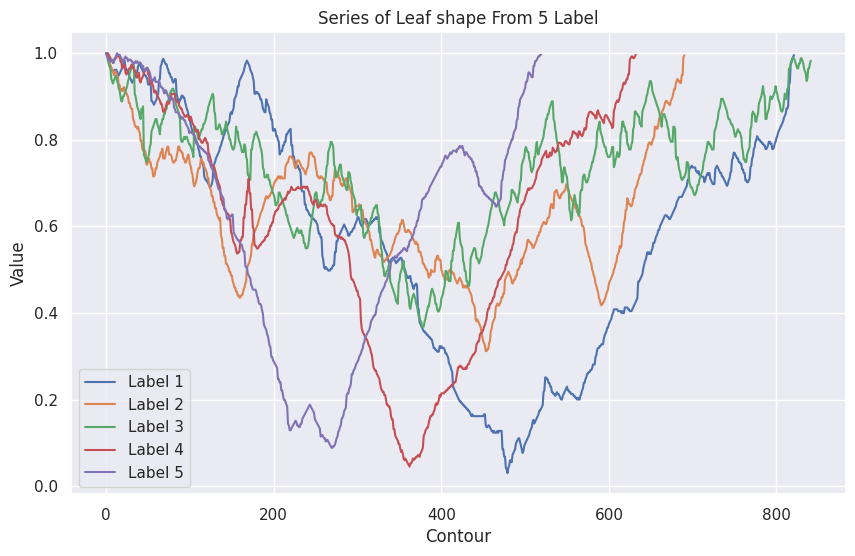

In [9]:
dft1 = series_class_1
dft2 = series_class_2
dft3 = series_class_3
dft4 = series_class_4
dft5 = series_class_5

plt.figure(figsize=(10, 6))
plt.plot(dft1[0], label='Label 1')
plt.plot(dft2[0], label='Label 2')
plt.plot(dft3[0], label='Label 3')
plt.plot(dft4[0], label='Label 4')
plt.plot(dft5[0], label='Label 5')
plt.title('Series of Leaf shape From 5 Label')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.legend(loc='best')
plt.grid(True)
plt.show()


show data distribution using gaussian inference

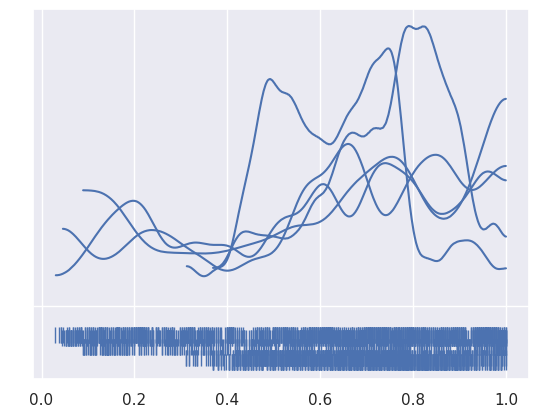

In [ ]:
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

az.plot_kde(np.array(dft1[0]), rug=True)
az.plot_kde(np.array(dft2[0]), rug=True)
az.plot_kde(np.array(dft3[0]), rug=True)
az.plot_kde(np.array(dft4[0]), rug=True)
az.plot_kde(np.array(dft5[0]), rug=True)
plt.yticks([0], alpha=0)
plt.show()


Draw orginal pseudo time series from label 1-5

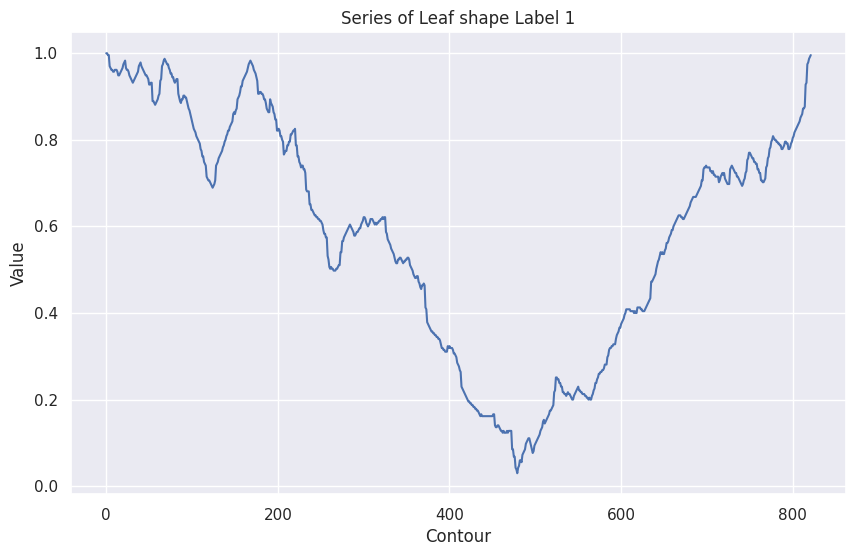

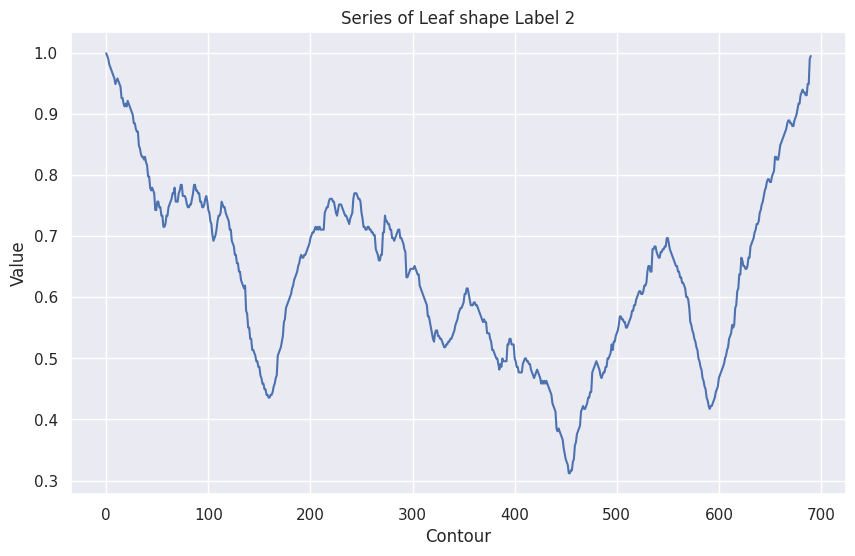

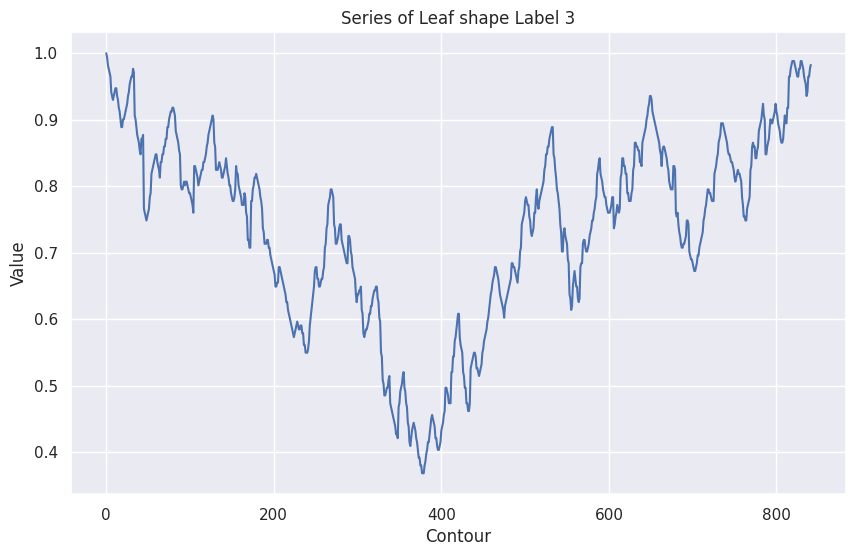

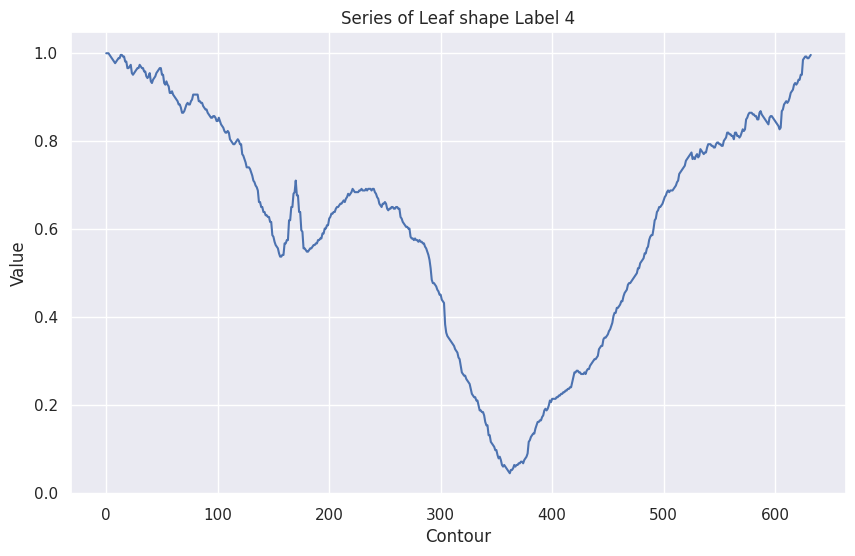

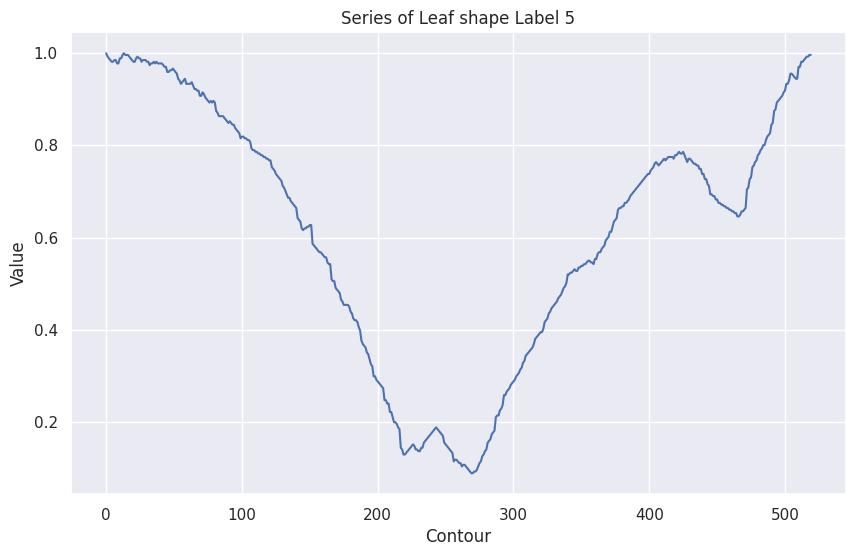

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dft1[0])
plt.title('Series of Leaf shape Label 1')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(dft2[0])
plt.title('Series of Leaf shape Label 2')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(dft3[0])
plt.title('Series of Leaf shape Label 3')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(dft4[0])
plt.title('Series of Leaf shape Label 4')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(dft5[0])
plt.title('Series of Leaf shape Label 5')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

We have done to separate series data for every label, now we resample these series in every label since they have unequal size

The dataset is time series data comes from leaf shape and have different size of series, when read dataset as Data Frame it shows blank space that is not represent the leaf shape filling as NaN or missing value automatically by Pandas Data Frame. 

We can't handle this different sizes with any handling missing values method, since it will change the shape of leaf and data distribution around it. 

Thus, we propose resample approach for unequal time series data using library from tslearn

**Resample for unequal pseudo time series data**

**Label 1**

In [39]:
from tslearn.utils import to_time_series_dataset
X1 = to_time_series_dataset(series_class_1)
# X1

from tslearn.preprocessing import TimeSeriesResampler
resampled_X1 = TimeSeriesResampler(sz=X1.shape[1]).fit_transform(X1)
resampled_X1.shape

(95, 988, 1)

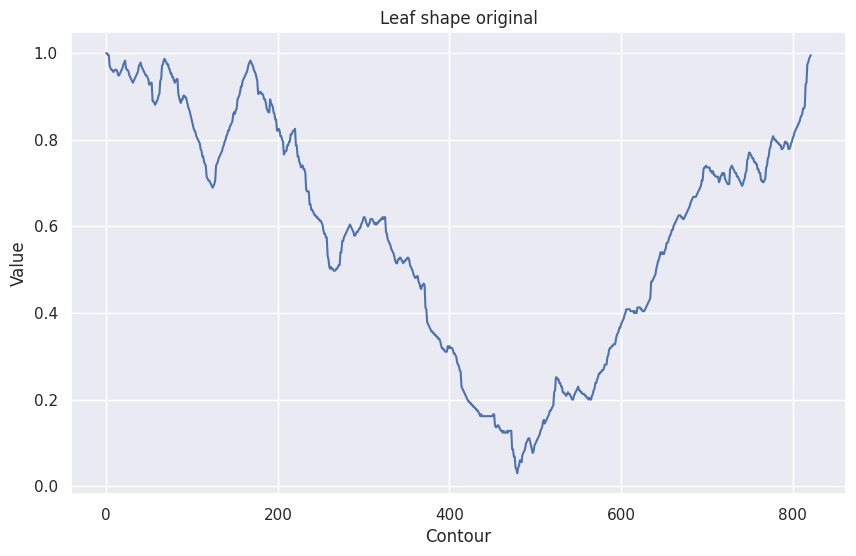

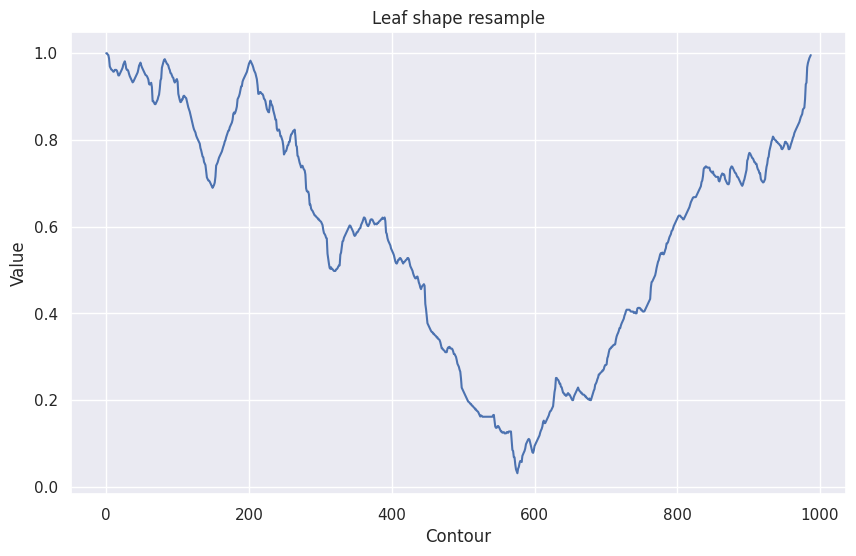

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dft1[0])
plt.title('Leaf shape original')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(resampled_X1[0])
plt.title('Leaf shape resample')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

**Label 2**

In [11]:
from tslearn.utils import to_time_series_dataset
X2 = to_time_series_dataset(series_class_2)

from tslearn.preprocessing import TimeSeriesResampler
resampled_X2 = TimeSeriesResampler(sz=X2.shape[1]).fit_transform(X2)
resampled_X2.shape

(73, 790, 1)

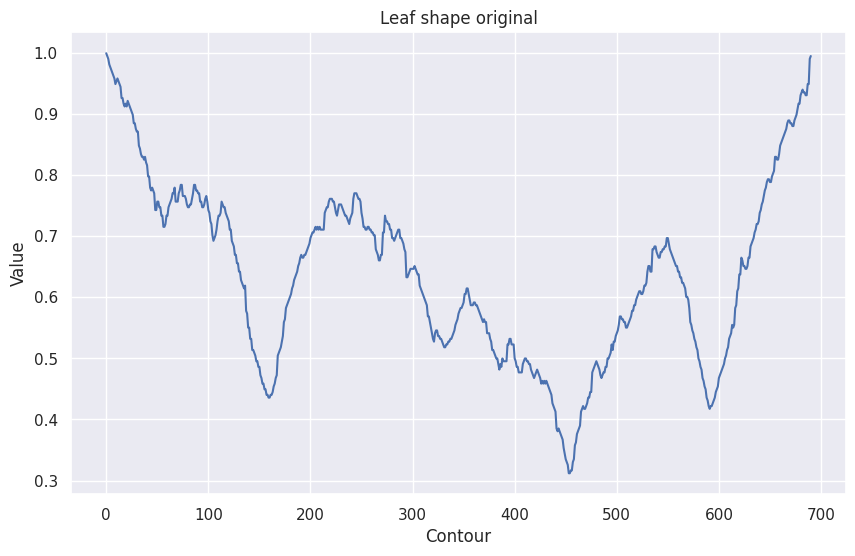

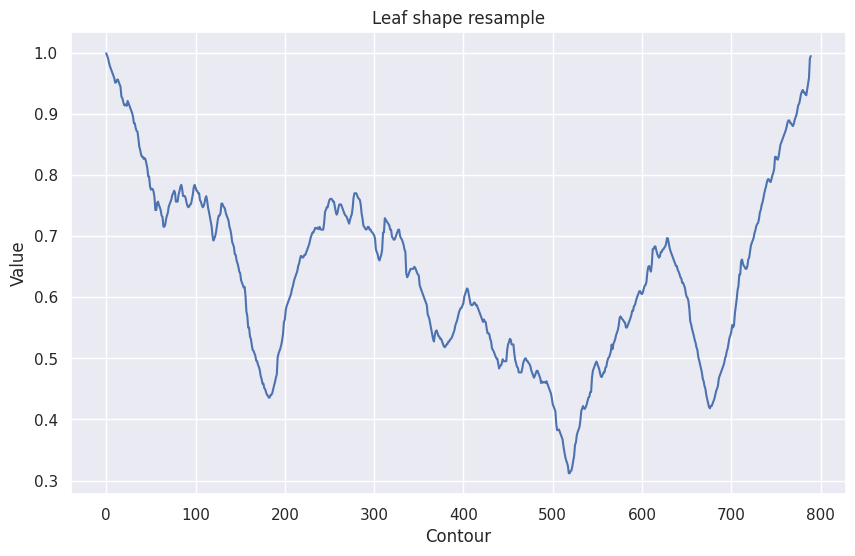

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dft2[0])
plt.title('Leaf shape original')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(resampled_X2[0])
plt.title('Leaf shape resample')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

**Label 3**

In [12]:
from tslearn.utils import to_time_series_dataset
X3 = to_time_series_dataset(series_class_3)

from tslearn.preprocessing import TimeSeriesResampler
resampled_X3 = TimeSeriesResampler(sz=X3.shape[1]).fit_transform(X3)
resampled_X3.shape

(96, 1086, 1)

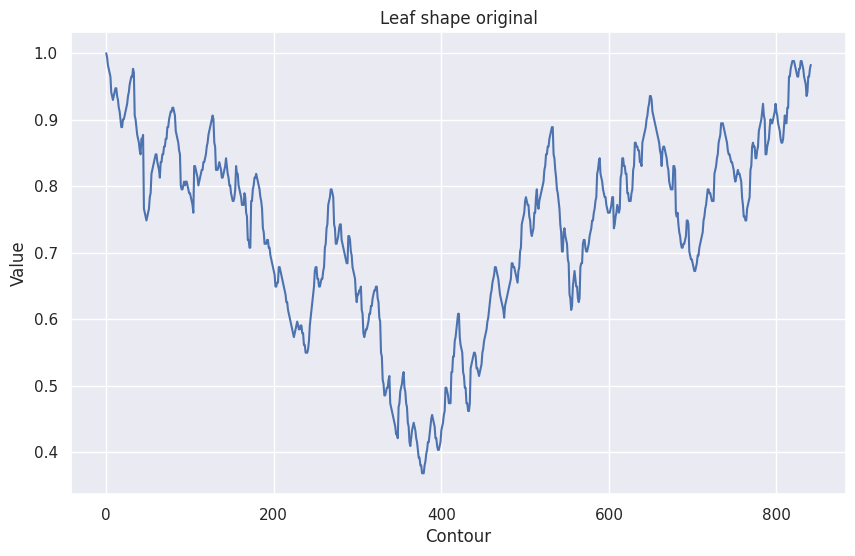

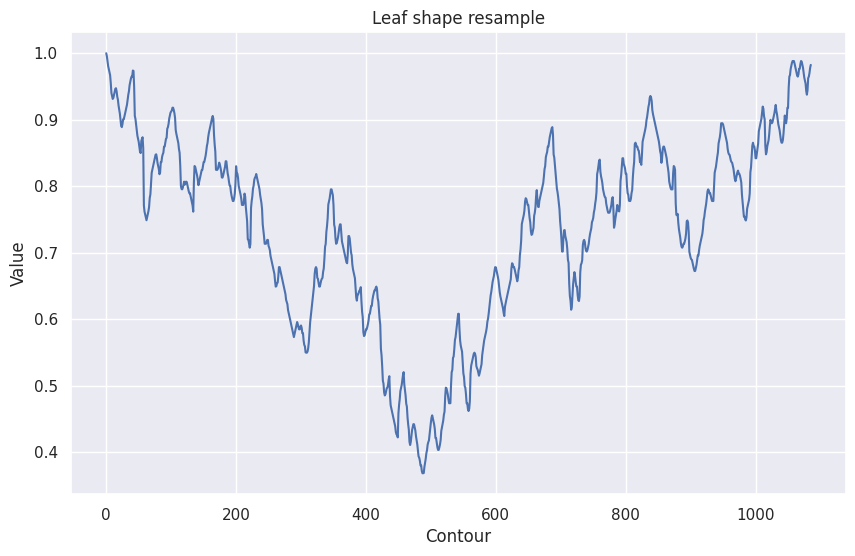

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dft3[0])
plt.title('Leaf shape original')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(resampled_X3[0])
plt.title('Leaf shape resample')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

**Label 4**

In [13]:
from tslearn.utils import to_time_series_dataset
X4 = to_time_series_dataset(series_class_4)

from tslearn.preprocessing import TimeSeriesResampler
resampled_X4 = TimeSeriesResampler(sz=X4.shape[1]).fit_transform(X4)
resampled_X4.shape

(89, 1063, 1)

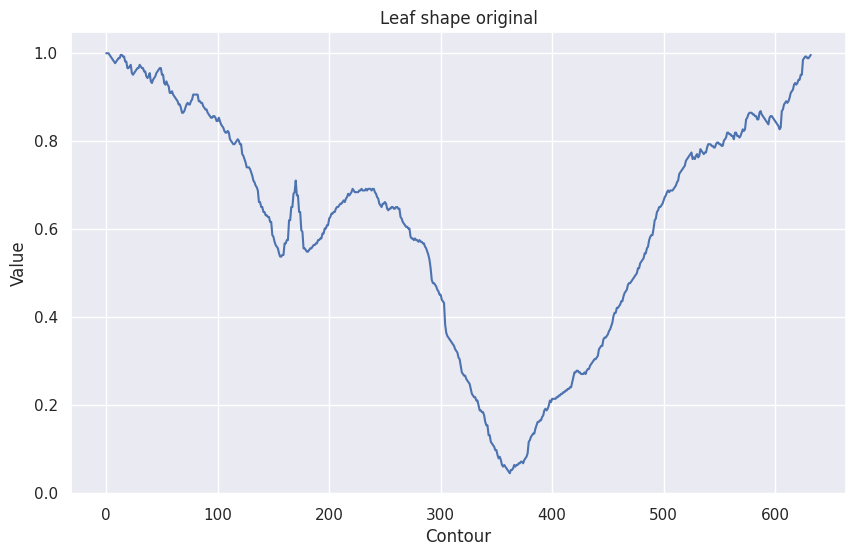

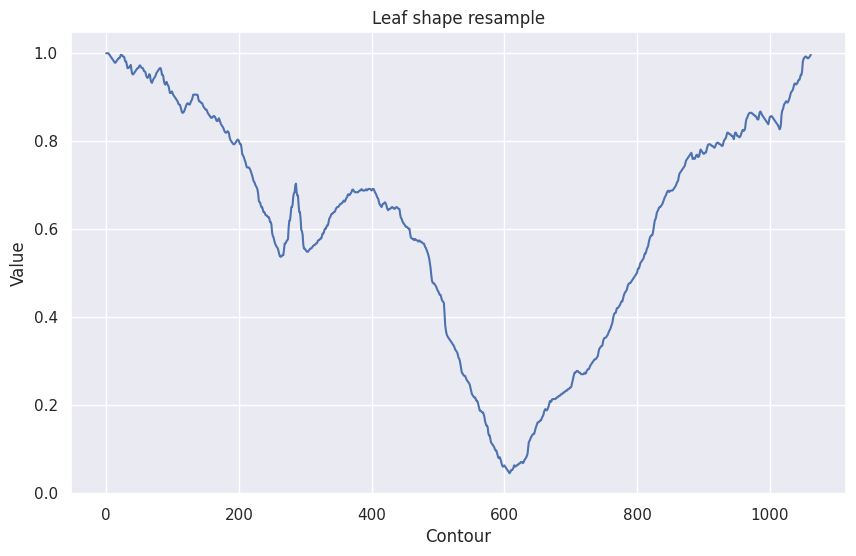

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dft4[0])
plt.title('Leaf shape original')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(resampled_X4[0])
plt.title('Leaf shape resample')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

**Label 5**

In [14]:
from tslearn.utils import to_time_series_dataset
X5 = to_time_series_dataset(series_class_5)

from tslearn.preprocessing import TimeSeriesResampler
resampled_X5 = TimeSeriesResampler(sz=X5.shape[1]).fit_transform(X5)
resampled_X5.shape

(24, 731, 1)

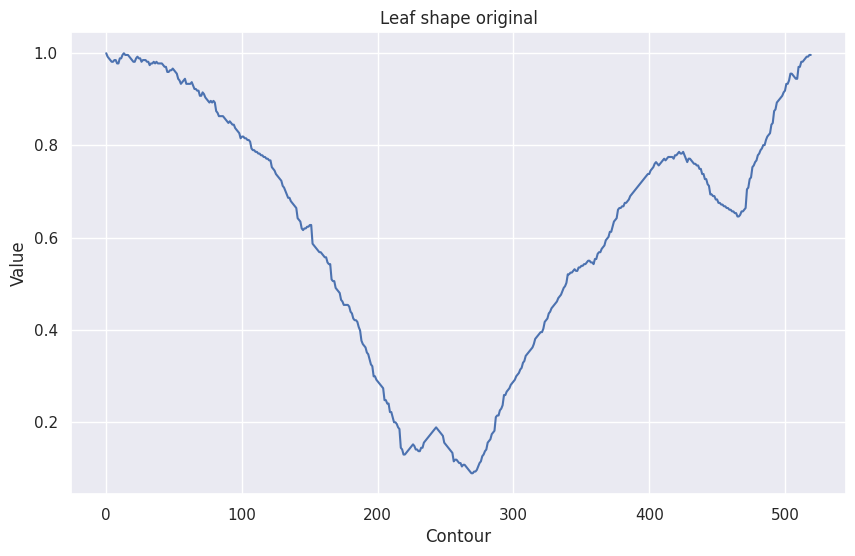

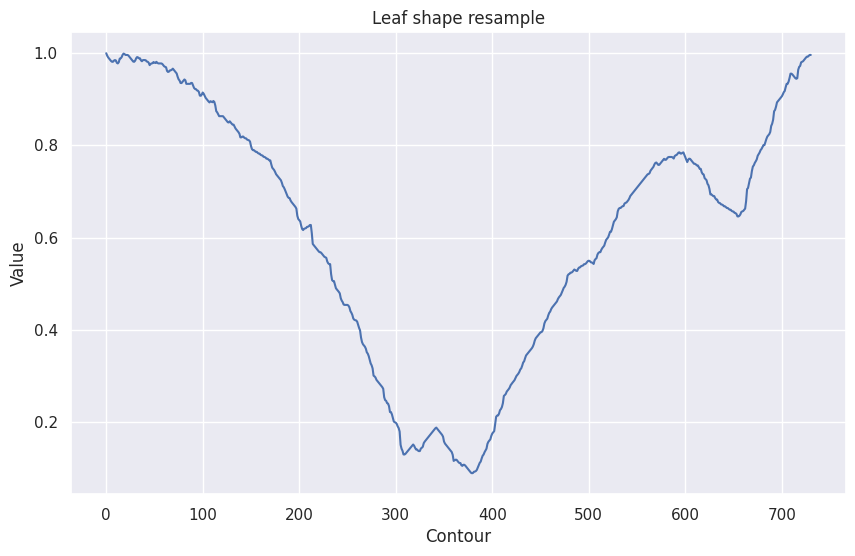

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(dft5[0])
plt.title('Leaf shape original')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(resampled_X5[0])
plt.title('Leaf shape resample')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

Image shows there is no change after we perform resampling technique, now draw the shape of leaf from each label to have better view about the dataset

We have done to resample unequal pseudo time series data for each label

Column represent the length of contour for every leaf shape series. And row represent number of pseudo time series data

show data distribution of leaf shape

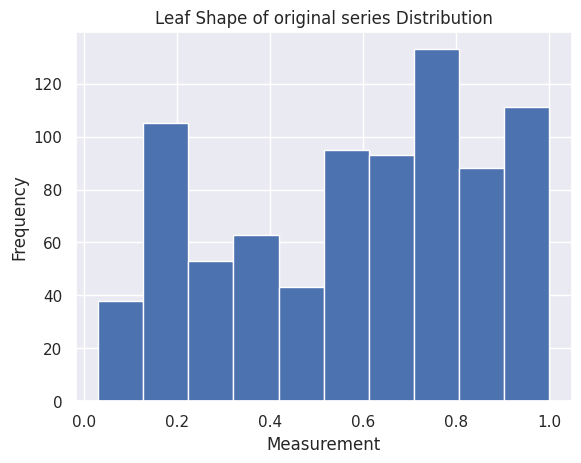

In [ ]:
plt.hist(dft1[0])
plt.title('Leaf Shape of original series Distribution')
plt.xlabel('Measurement')
plt.ylabel('Frequency')
plt.show()

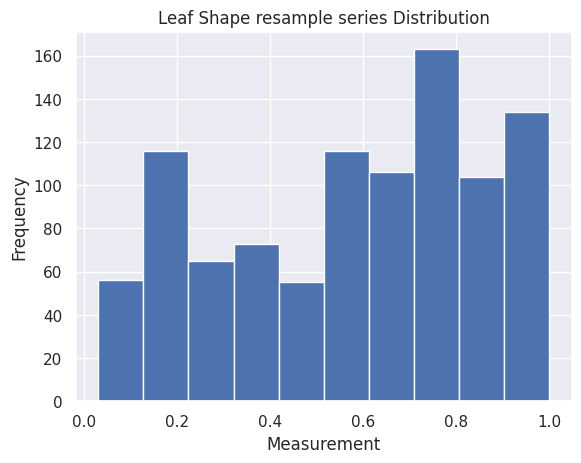

In [ ]:
plt.hist(resampled_X1[0])
plt.title('Leaf Shape resample series Distribution')
plt.xlabel('Measurement')
plt.ylabel('Frequency')
plt.show()

Show data distribution with gaussian inference

([<matplotlib.axis.YTick at 0x7fec85b7ceb0>], [Text(0, 0, '0')])

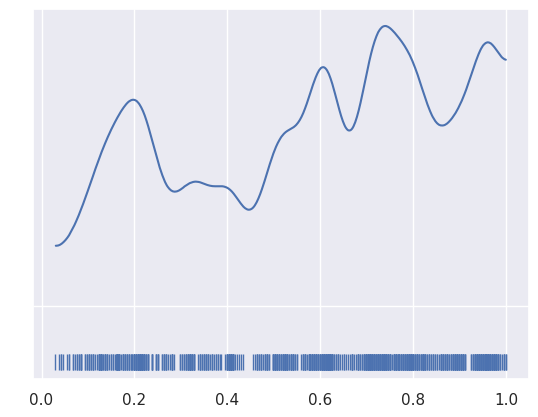

In [ ]:
%matplotlib inline

az.plot_kde(np.array(dft1[0]), rug=True)
plt.yticks([0], alpha=0)

([<matplotlib.axis.YTick at 0x7fec859d2dd0>], [Text(0, 0, '0')])

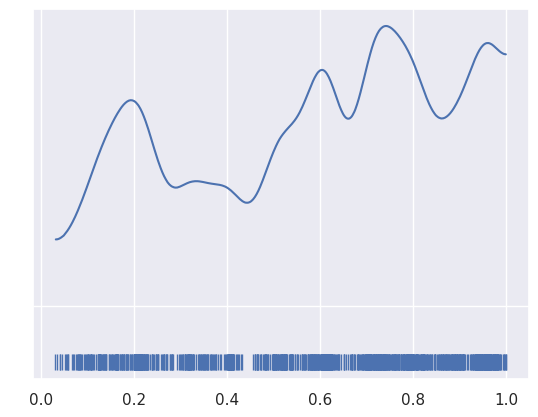

In [ ]:
%matplotlib inline

az.plot_kde(resampled_X1[0], rug=True)
plt.yticks([0], alpha=0)

Both data distrubution using histogram and normal distribution shows there are no change on the shape between original data and resample data

## Model

We will perform Gaussian inferences on the leaf shape time series data. Here's some of the modelling choices that go into this.

Choices for leaf shape likelihood function:

The leaf shape data is modelled as a linear combination of the independent variables. We assume that the leaf shape time series data is going to be normally distributed around the linear combination of independent variables with the same variance around the expected value.

That is how we proceed below:

**Label 1**

In [ ]:
import tensorflow as tf
import tensorflow_probability as tfp


In [ ]:
from scipy.stats import ks_2samp

kernel = tfp.math.psd_kernels.ExponentiatedQuadratic()
index_points = np.linspace(0, resampled_X1.shape[1]-1, resampled_X1.shape[1])
index_points = index_points.astype(np.float64).reshape(-1, 1)

synthetic_series = []
ks_statistics = []
p_values = []
losses = []

for _ in range(100):
    total_mean = np.zeros((resampled_X1.shape[1],))
    total_var = np.zeros((resampled_X1.shape[1],))

    for i in range(resampled_X1.shape[0]):
        y = resampled_X1[i, :, 0].astype(np.float64)
        gp = tfp.distributions.GaussianProcess(kernel, index_points, jitter=1e-6)
        optimizer = tf.optimizers.Adam(learning_rate=.01)

        @tf.function
        def optimize():
            with tf.GradientTape() as tape:
                loss = -gp.log_prob(y)
            grads = tape.gradient(loss, gp.trainable_variables)
            optimizer.apply_gradients(zip(grads, gp.trainable_variables))
            return loss

        for j in range(50):
            loss = optimize()
            losses.append(loss)
            if j % 20 == 0:
                # print("Loss at step %d: %f" % (j, loss))
                pass

        gprm = tfp.distributions.GaussianProcessRegressionModel(
            kernel=kernel,
            index_points=index_points,
            observation_index_points=index_points,
            observations=y,
            jitter=1e-6)
        total_mean += gprm.mean().numpy()
        total_var += gprm.variance().numpy()

    avg_mean = total_mean / resampled_X1.shape[0]
    avg_var = total_var / resampled_X1.shape[0]
    avg_std = np.sqrt(avg_var)

    # Generate synthetic series
    y_synthetic = np.random.normal(loc=avg_mean, scale=avg_std)
    synthetic_series.append(y_synthetic)
    
    # Perform KS test
    ks_statistic, p_value = ks_2samp(y, y_synthetic)
    ks_statistics.append(ks_statistic)
    p_values.append(p_value)

    # print("Done")

Evaluation KS-test

In [ ]:
average_ks_statistic = np.mean(ks_statistics)
average_p_value = np.mean(p_values)

print("Average KS Statistic:", average_ks_statistic)
print("Average P-value:", average_p_value)

Average KS Statistic: 0.14160931174089067
Average P-value: 4.761434603302381e-09


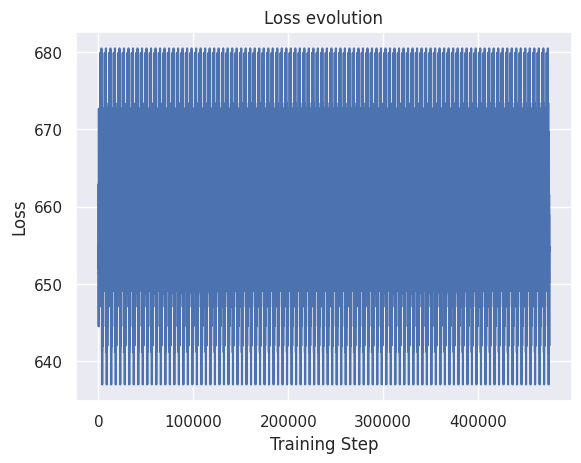

In [ ]:
plt.plot(losses)
plt.title('Loss evolution')
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.show()


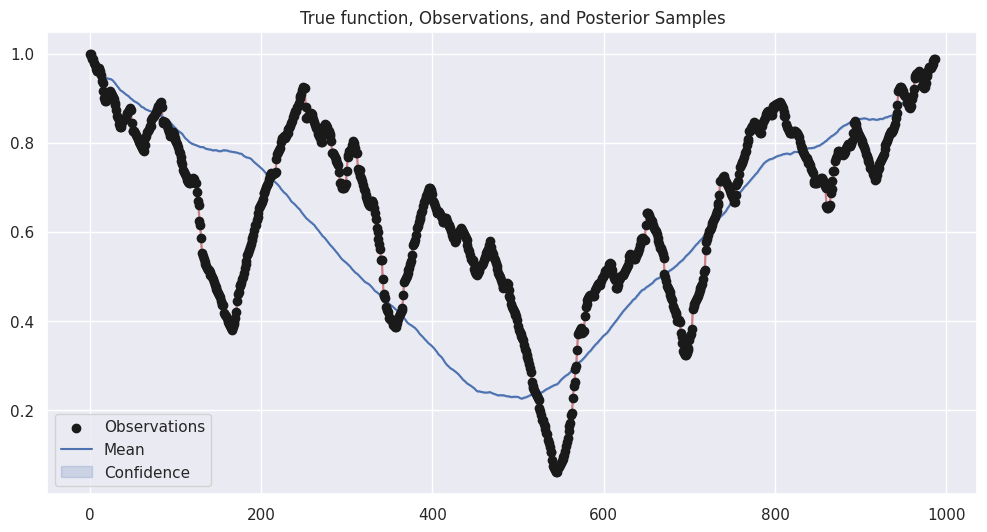

In [26]:
num_samples = 10
samples = gprm.sample(num_samples)

samples = samples.numpy()
avg_mean = avg_mean
avg_std = avg_std

plt.figure(figsize=(12, 6))
plt.plot(index_points, samples.T, c='r', alpha=.1)
plt.scatter(index_points, y, c='k', zorder=3, label='Observations')
plt.plot(index_points, avg_mean, c='b', label='Mean')
plt.fill_between(index_points.ravel(), 
                 avg_mean - avg_std, 
                 avg_mean + avg_std, 
                 color='b', alpha=0.2, label='Confidence')
plt.title('True function, Observations, and Posterior Samples')
plt.legend()
plt.show()


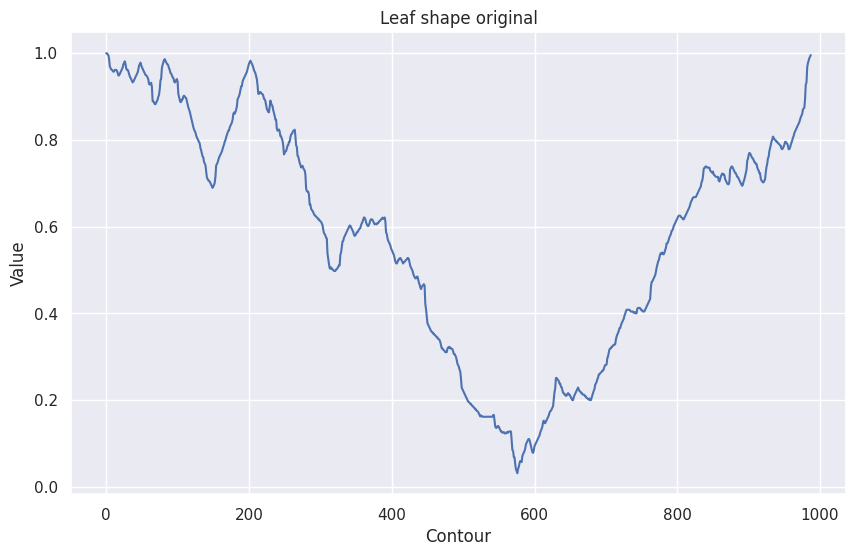

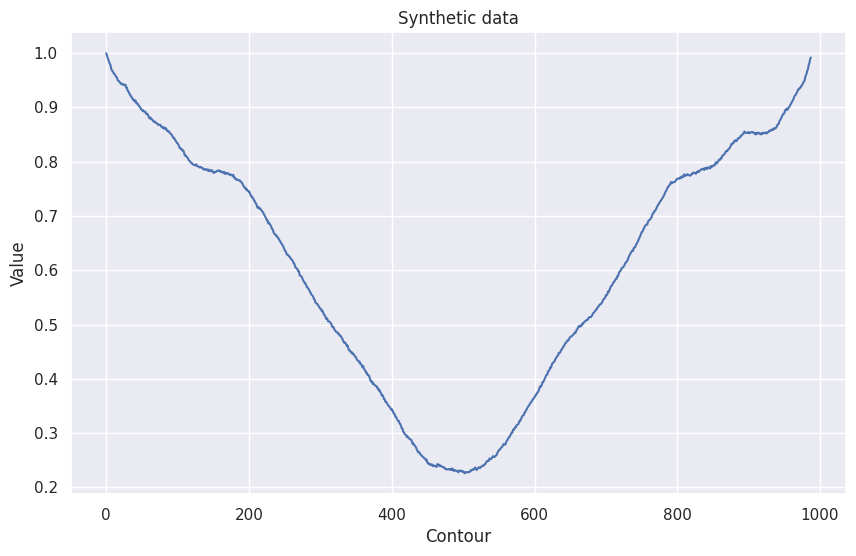

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(resampled_X1[0])
plt.title('Leaf shape original')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(synthetic_series[0])
plt.title('Synthetic data')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

Figure above shows that synthetic data have different shape with original data, thus shows that this model is not good to generate synthetic data from unequal time series data.

We instantiate the Models in TensorFlow like above.

model called Gaussian process regression (GPR) which use Bayesian probabilistic from TensorFlow was used

This model allows prediction without prior fitting (based on the GP prior)



**Label 2**

In [ ]:
@tf.function
def optimize2():
    with tf.GradientTape() as tape:
        loss = -gp.log_prob(y2)
    grads = tape.gradient(loss, gp.trainable_variables)
    optimizer.apply_gradients(zip(grads, gp.trainable_variables))
    return loss

In [ ]:
from scipy.stats import ks_2samp

kernel = tfp.math.psd_kernels.ExponentiatedQuadratic()
index_points2 = np.linspace(0, resampled_X2.shape[1]-1, resampled_X2.shape[1])
index_points2 = index_points2.astype(np.float64).reshape(-1, 1)

synthetic_series2 = []
ks_statistics2 = []
p_values2 = []
losses2 = []

for _ in range(100):
    total_mean2 = np.zeros((resampled_X2.shape[1],))
    total_var2 = np.zeros((resampled_X2.shape[1],))

    for i in range(resampled_X2.shape[0]):
        y2 = resampled_X2[i, :, 0].astype(np.float64)
        gp = tfp.distributions.GaussianProcess(kernel, index_points2, jitter=1e-6)
        optimizer = tf.optimizers.Adam(learning_rate=.01)

        for j in range(50):
            loss = optimize2()
            losses2.append(loss)
            if j % 20 == 0:
                # print("Loss at step %d: %f" % (j, loss))
                pass

        gprm = tfp.distributions.GaussianProcessRegressionModel(
            kernel=kernel,
            index_points=index_points2,
            observation_index_points=index_points2,
            observations=y2,
            jitter=1e-6)
        total_mean2 += gprm.mean().numpy()
        total_var2 += gprm.variance().numpy()

    avg_mean2 = total_mean2 / resampled_X2.shape[0]
    avg_var2 = total_var2 / resampled_X2.shape[0]
    avg_std2 = np.sqrt(avg_var2)

    # Generate synthetic series
    y_synthetic2 = np.random.normal(loc=avg_mean2, scale=avg_std2)
    synthetic_series2.append(y_synthetic2)
    
    # Perform KS test
    ks_statistic2, p_value2 = ks_2samp(y2, y_synthetic2)
    ks_statistics2.append(ks_statistic2)
    p_values2.append(p_value2)

    # print("Done")

evaluation ks-test

In [29]:
average_ks_statistic2 = np.mean(ks_statistics2)
average_p_value2 = np.mean(p_values2)

print("Average KS Statistic:", average_ks_statistic2)
print("Average P-value:", average_p_value2)

Average KS Statistic: 0.22574683544303792
Average P-value: 5.1380178707179454e-18


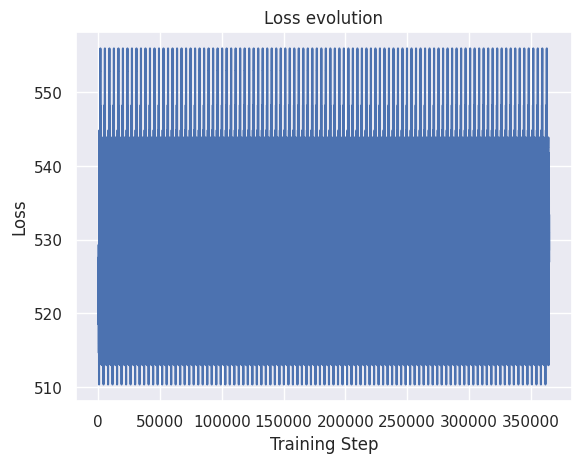

In [30]:
plt.plot(losses2)
plt.title('Loss evolution')
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.show()


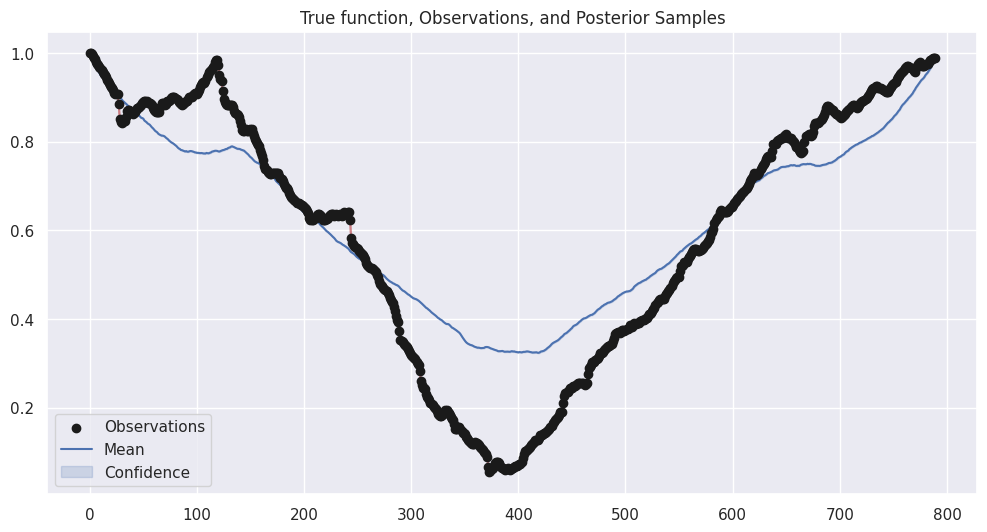

In [31]:
num_samples2 = 10
samples2 = gprm.sample(num_samples2)

samples2 = samples2.numpy()
avg_mean2 = avg_mean2
avg_std2 = avg_std2

plt.figure(figsize=(12, 6))
plt.plot(index_points2, samples2.T, c='r', alpha=.1)
plt.scatter(index_points2, y2, c='k', zorder=3, label='Observations')
plt.plot(index_points2, avg_mean2, c='b', label='Mean')
plt.fill_between(index_points2.ravel(), 
                 avg_mean2 - avg_std2, 
                 avg_mean2 + avg_std2, 
                 color='b', alpha=0.2, label='Confidence')
plt.title('True function, Observations, and Posterior Samples')
plt.legend()
plt.show()


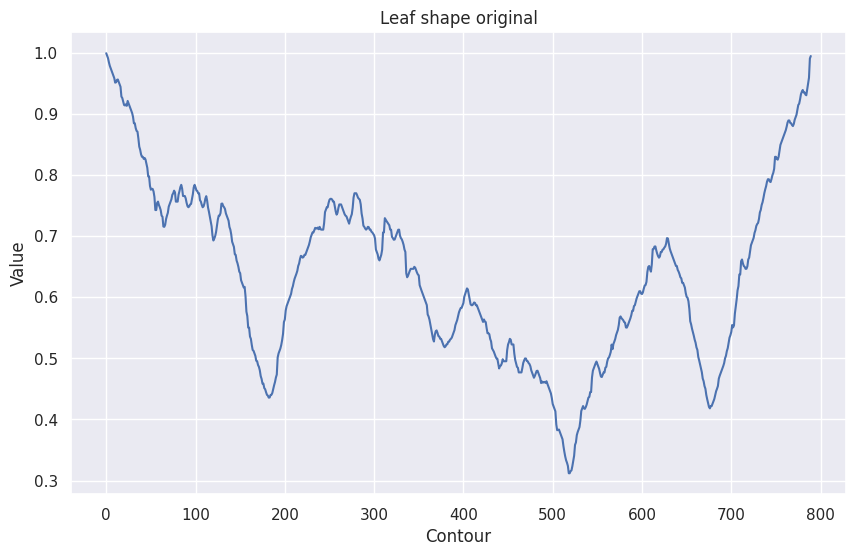

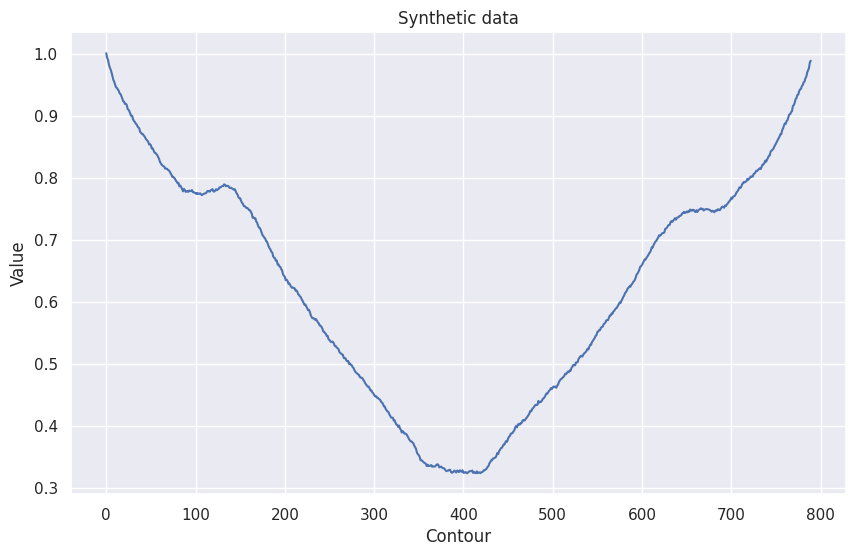

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(resampled_X2[0])
plt.title('Leaf shape original')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(synthetic_series2[0])
plt.title('Synthetic data')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

**Label 3**

In [ ]:
from scipy.stats import ks_2samp

kernel = tfp.math.psd_kernels.ExponentiatedQuadratic()
index_points3 = np.linspace(0, resampled_X3.shape[1]-1, resampled_X3.shape[1])
index_points3 = index_points3.astype(np.float64).reshape(-1, 1)

synthetic_series3 = []
ks_statistics3 = []
p_values3 = []
losses3 = []

for _ in range(100):
    total_mean3 = np.zeros((resampled_X3.shape[1],))
    total_var3 = np.zeros((resampled_X3.shape[1],))

    for i in range(resampled_X3.shape[0]):
        y3 = resampled_X3[i, :, 0].astype(np.float64)
        gp = tfp.distributions.GaussianProcess(kernel, index_points3, jitter=1e-6)
        optimizer = tf.optimizers.Adam(learning_rate=.01)

        @tf.function
        def optimize3():
            with tf.GradientTape() as tape:
                loss = -gp.log_prob(y3)
            grads = tape.gradient(loss, gp.trainable_variables)
            optimizer.apply_gradients(zip(grads, gp.trainable_variables))
            return loss

        for j in range(50):
            loss = optimize3()
            losses3.append(loss)
            if j % 20 == 0:
                # print("Loss at step %d: %f" % (j, loss))
                pass

        gprm = tfp.distributions.GaussianProcessRegressionModel(
            kernel=kernel,
            index_points=index_points3,
            observation_index_points=index_points3,
            observations=y3,
            jitter=1e-6)
        total_mean3 += gprm.mean().numpy()
        total_var3 += gprm.variance().numpy()

    avg_mean3 = total_mean3 / resampled_X3.shape[0]
    avg_var3 = total_var3 / resampled_X3.shape[0]
    avg_std3 = np.sqrt(avg_var3)

    # Generate synthetic series
    y_synthetic3 = np.random.normal(loc=avg_mean3, scale=avg_std3)
    synthetic_series3.append(y_synthetic3)
    
    # Perform KS test
    ks_statistic3, p_value3 = ks_2samp(y3, y_synthetic3)
    ks_statistics3.append(ks_statistic3)
    p_values3.append(p_value3)

    # print("Done")

Evaluation KS-test

In [33]:
average_ks_statistic3 = np.mean(ks_statistics3)
average_p_value3 = np.mean(p_values3)

print("Average KS Statistic:", average_ks_statistic3)
print("Average P-value:", average_p_value3)

Average KS Statistic: 0.1228268876611418
Average P-value: 1.506849818741168e-07


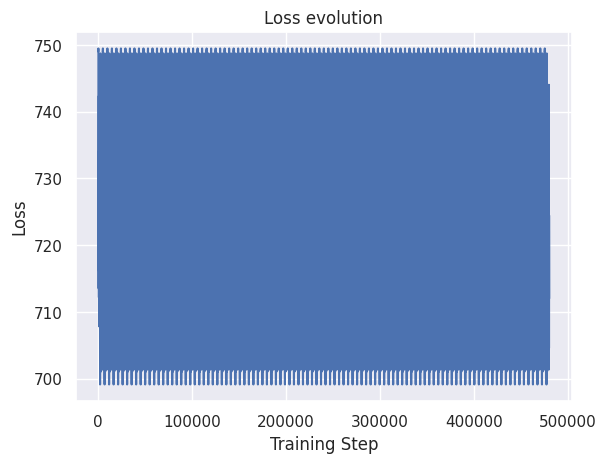

In [34]:
plt.plot(losses3)
plt.title('Loss evolution')
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.show()


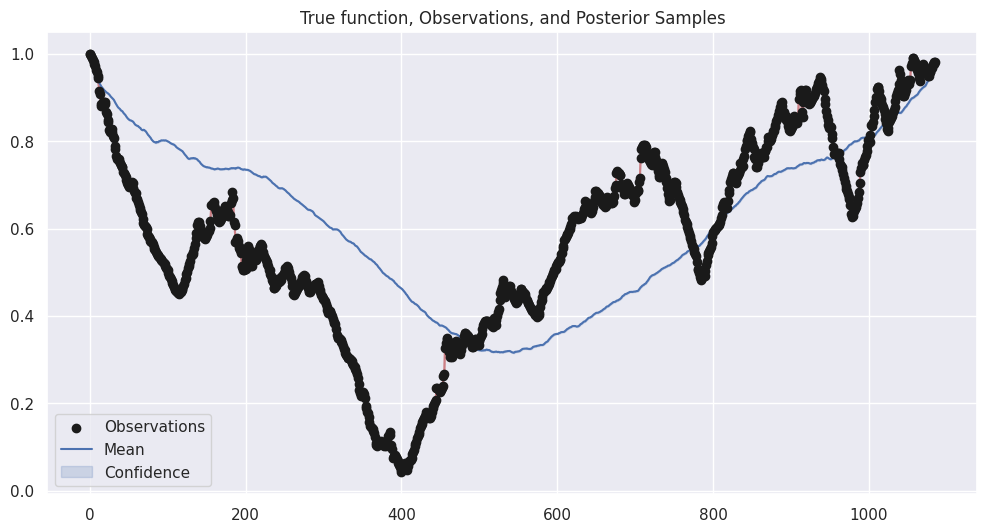

In [35]:
#num_samples3 = 10
samples3 = gprm.sample(num_samples3)

samples3 = samples3.numpy()
avg_mean3 = avg_mean3
avg_std3 = avg_std3

plt.figure(figsize=(12, 6))
plt.plot(index_points3, samples3.T, c='r', alpha=.1)
plt.scatter(index_points3, y3, c='k', zorder=3, label='Observations')
plt.plot(index_points3, avg_mean3, c='b', label='Mean')
plt.fill_between(index_points3.ravel(), 
                 avg_mean3 - avg_std3, 
                 avg_mean3 + avg_std3, 
                 color='b', alpha=0.2, label='Confidence')
plt.title('True function, Observations, and Posterior Samples')
plt.legend()
plt.show()


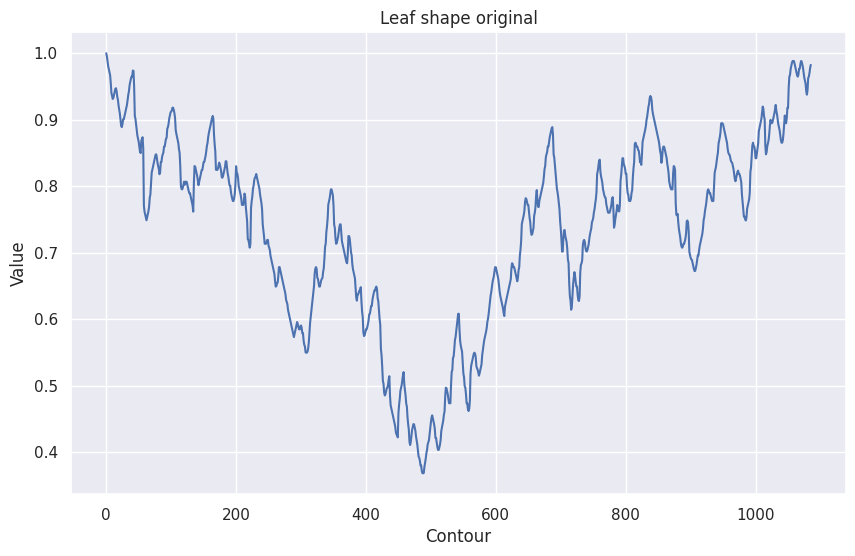

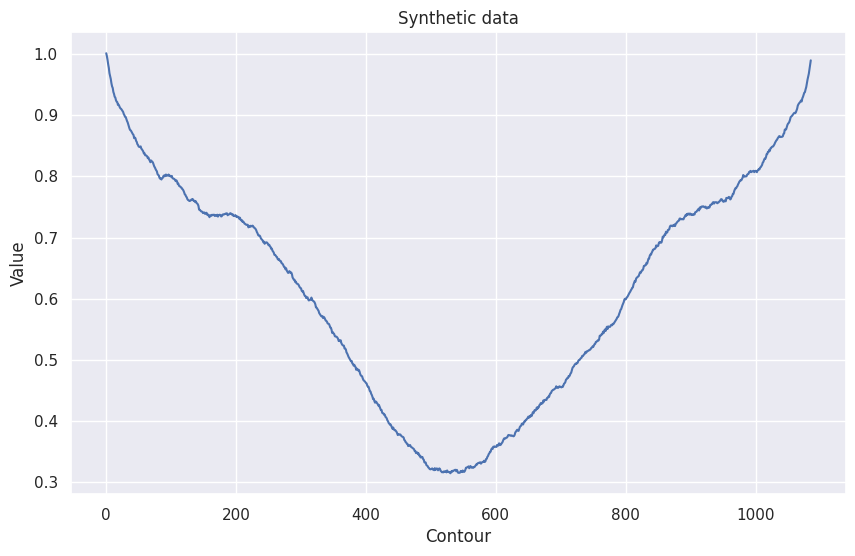

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(resampled_X3[0])
plt.title('Leaf shape original')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(synthetic_series3[0])
plt.title('Synthetic data')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

**Label 4**

In [ ]:
from scipy.stats import ks_2samp

kernel = tfp.math.psd_kernels.ExponentiatedQuadratic()
index_points4 = np.linspace(0, resampled_X4.shape[1]-1, resampled_X4.shape[1])
index_points4 = index_points4.astype(np.float64).reshape(-1, 1)

synthetic_series4 = []
ks_statistics4 = []
p_values4 = []
losses4 = []

for _ in range(100):
    total_mean4 = np.zeros((resampled_X4.shape[1],))
    total_var4 = np.zeros((resampled_X4.shape[1],))

    for i in range(resampled_X4.shape[0]):
        y4 = resampled_X4[i, :, 0].astype(np.float64)
        gp = tfp.distributions.GaussianProcess(kernel, index_points4, jitter=1e-6)
        optimizer = tf.optimizers.Adam(learning_rate=.01)

        @tf.function
        def optimize4():
            with tf.GradientTape() as tape:
                loss = -gp.log_prob(y4)
            grads = tape.gradient(loss, gp.trainable_variables)
            optimizer.apply_gradients(zip(grads, gp.trainable_variables))
            return loss

        for j in range(50):
            loss = optimize4()
            losses4.append(loss)
            if j % 20 == 0:
                # print("Loss at step %d: %f" % (j, loss))
                pass

        gprm = tfp.distributions.GaussianProcessRegressionModel(
            kernel=kernel,
            index_points=index_points4,
            observation_index_points=index_points4,
            observations=y4,
            jitter=1e-6)
        total_mean4 += gprm.mean().numpy()
        total_var4 += gprm.variance().numpy()

    avg_mean4 = total_mean4 / resampled_X4.shape[0]
    avg_var4 = total_var4 / resampled_X4.shape[0]
    avg_std4 = np.sqrt(avg_var4)

    # Generate synthetic series
    y_synthetic4 = np.random.normal(loc=avg_mean4, scale=avg_std4)
    synthetic_series4.append(y_synthetic4)
    
    # Perform KS test
    ks_statistic4, p_value4 = ks_2samp(y4, y_synthetic4)
    ks_statistics4.append(ks_statistic4)
    p_values4.append(p_value4)

    # print("Done")

Evaluation KS-test

In [37]:
average_ks_statistic4 = np.mean(ks_statistics4)
average_p_value4 = np.mean(p_values4)

print("Average KS Statistic:", average_ks_statistic4)
print("Average P-value:", average_p_value4)

Average KS Statistic: 0.11705550329256816
Average P-value: 9.262135591786447e-07


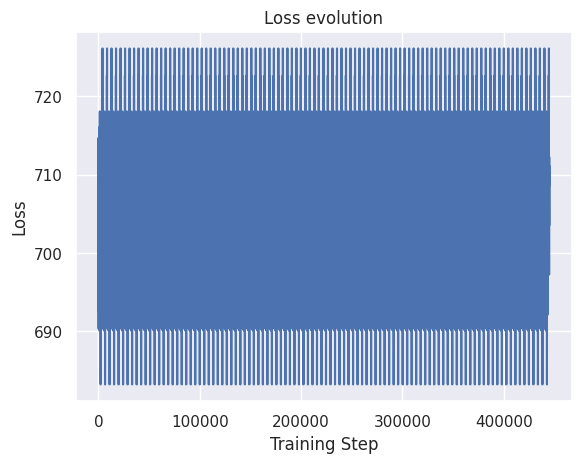

In [38]:
import matplotlib.pyplot as plt

plt.plot(losses4)
plt.title('Loss evolution')
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.show()


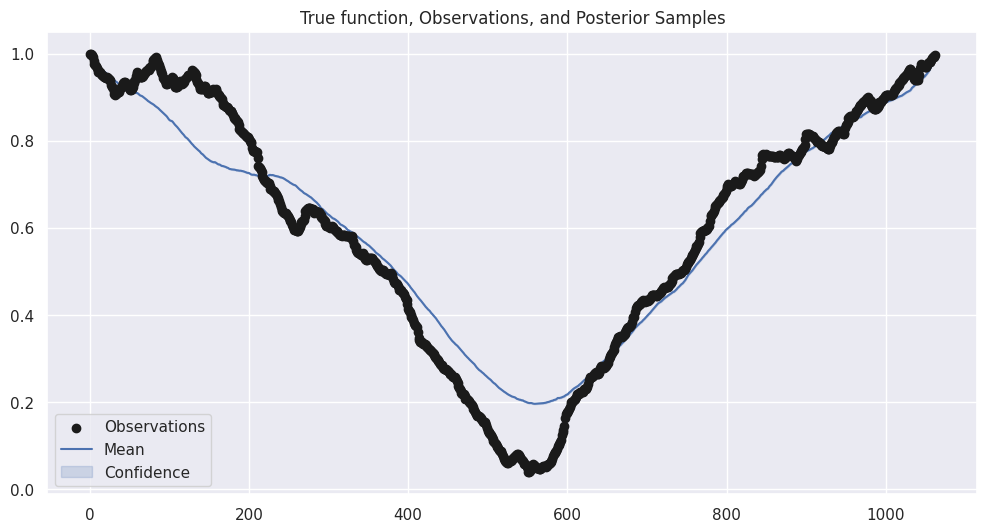

In [39]:
num_samples4 = 10
samples4 = gprm.sample(num_samples4)

samples4 = samples4.numpy()
avg_mean4 = avg_mean4
avg_std4 = avg_std4

plt.figure(figsize=(12, 6))
plt.plot(index_points4, samples4.T, c='r', alpha=.1)
plt.scatter(index_points4, y4, c='k', zorder=3, label='Observations')
plt.plot(index_points4, avg_mean4, c='b', label='Mean')
plt.fill_between(index_points4.ravel(), 
                 avg_mean4 - avg_std4, 
                 avg_mean4 + avg_std4, 
                 color='b', alpha=0.2, label='Confidence')
plt.title('True function, Observations, and Posterior Samples')
plt.legend()
plt.show()


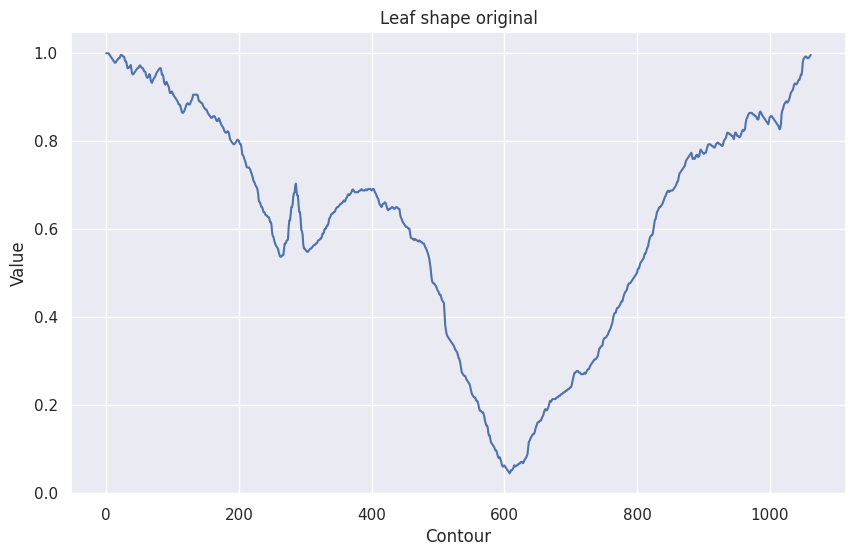

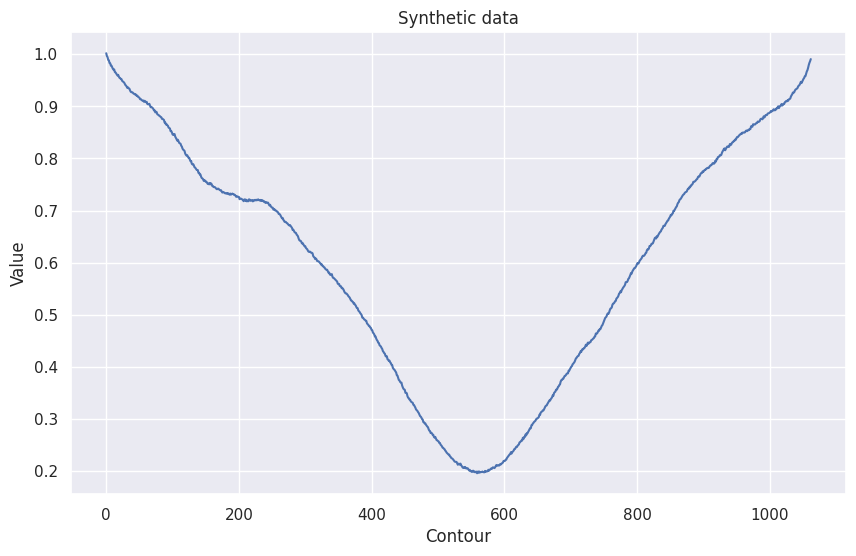

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(resampled_X4[0])
plt.title('Leaf shape original')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(synthetic_series4[0])
plt.title('Synthetic data')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

**Label 5**

In [ ]:
from scipy.stats import ks_2samp

kernel = tfp.math.psd_kernels.ExponentiatedQuadratic()
index_points5 = np.linspace(0, resampled_X5.shape[1]-1, resampled_X5.shape[1])
index_points5 = index_points5.astype(np.float64).reshape(-1, 1)

synthetic_series5 = []
ks_statistics5 = []
p_values5 = []
losses5 = []

for _ in range(100):
    total_mean5 = np.zeros((resampled_X5.shape[1],))
    total_var5 = np.zeros((resampled_X5.shape[1],))

    for i in range(resampled_X5.shape[0]):
        y5 = resampled_X5[i, :, 0].astype(np.float64)
        gp = tfp.distributions.GaussianProcess(kernel, index_points5, jitter=1e-6)
        optimizer = tf.optimizers.Adam(learning_rate=.01)

        @tf.function
        def optimize5():
            with tf.GradientTape() as tape:
                loss = -gp.log_prob(y5)
            grads = tape.gradient(loss, gp.trainable_variables)
            optimizer.apply_gradients(zip(grads, gp.trainable_variables))
            return loss

        for j in range(50):
            loss = optimize5()
            losses5.append(loss)
            if j % 20 == 0:
                # print("Loss at step %d: %f" % (j, loss))
                pass

        gprm = tfp.distributions.GaussianProcessRegressionModel(
            kernel=kernel,
            index_points=index_points5,
            observation_index_points=index_points5,
            observations=y5,
            jitter=1e-6)
        total_mean5 += gprm.mean().numpy()
        total_var5 += gprm.variance().numpy()

    avg_mean5 = total_mean5 / resampled_X5.shape[0]
    avg_var5 = total_var5 / resampled_X5.shape[0]
    avg_std5 = np.sqrt(avg_var5)

    # Generate synthetic series
    y_synthetic5 = np.random.normal(loc=avg_mean5, scale=avg_std5)
    synthetic_series5.append(y_synthetic5)
    
    # Perform KS test
    ks_statistic5, p_value5 = ks_2samp(y5, y_synthetic5)
    ks_statistics5.append(ks_statistic5)
    p_values5.append(p_value5)

    # print("Done")

Evaluation KS-test

In [41]:
average_ks_statistic5 = np.mean(ks_statistics5)
average_p_value5 = np.mean(p_values5)

print("Average KS Statistic:", average_ks_statistic5)
print("Average P-value:", average_p_value5)

Average KS Statistic: 0.10458276333789333
Average P-value: 0.0006713070231813264


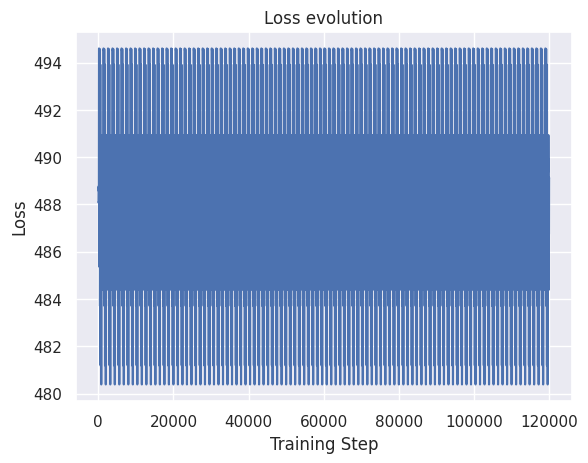

In [42]:
import matplotlib.pyplot as plt

plt.plot(losses5)
plt.title('Loss evolution')
plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.show()


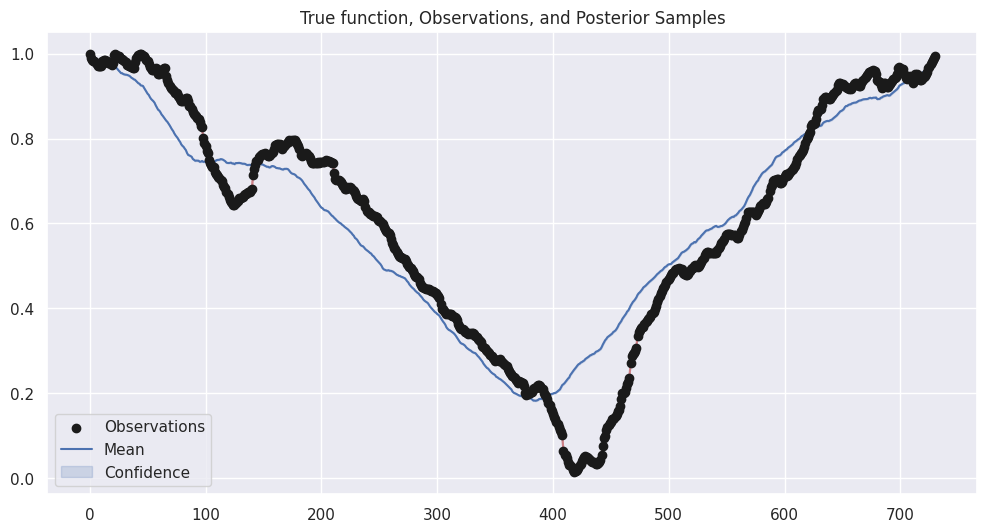

In [43]:
num_samples5 = 10
samples5 = gprm.sample(num_samples5)

samples5 = samples5.numpy()
avg_mean5 = avg_mean5
avg_std5 = avg_std5

plt.figure(figsize=(12, 6))
plt.plot(index_points5, samples5.T, c='r', alpha=.1)
plt.scatter(index_points5, y5, c='k', zorder=3, label='Observations')
plt.plot(index_points5, avg_mean5, c='b', label='Mean')
plt.fill_between(index_points5.ravel(), 
                 avg_mean5 - avg_std5, 
                 avg_mean5 + avg_std5, 
                 color='b', alpha=0.2, label='Confidence')
plt.title('True function, Observations, and Posterior Samples')
plt.legend()
plt.show()


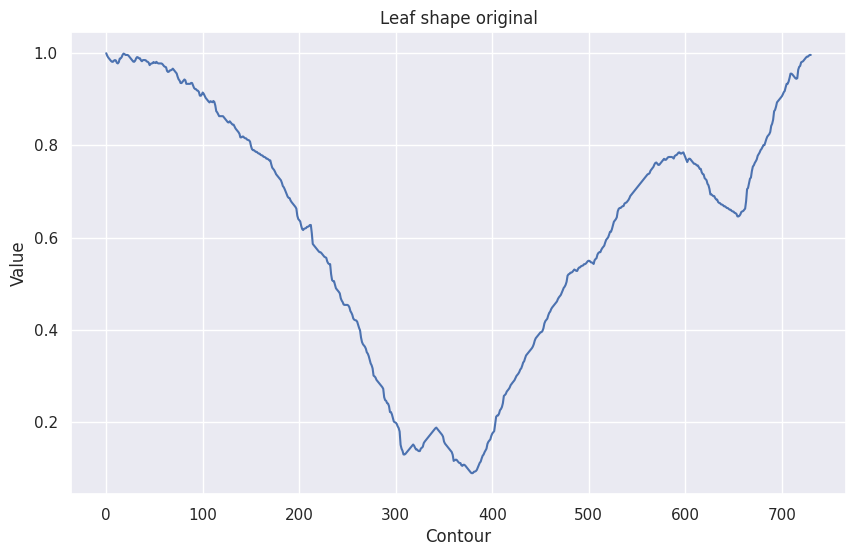

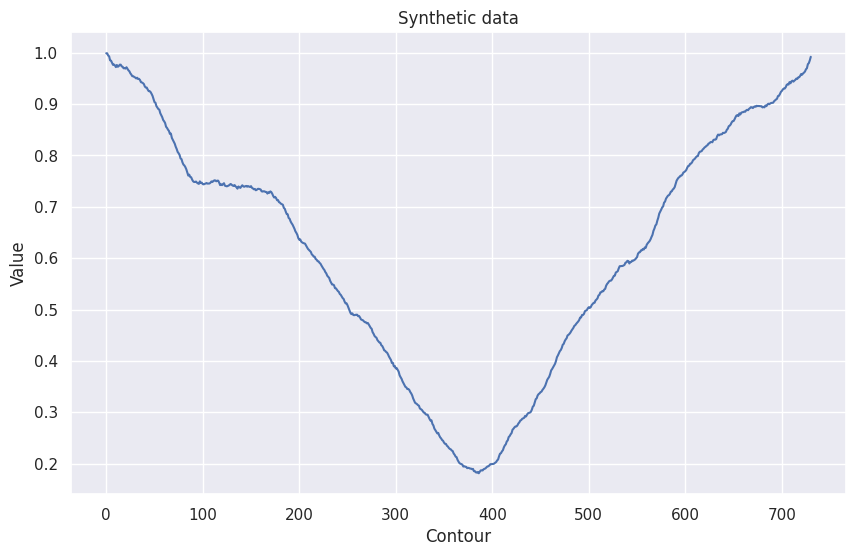

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(resampled_X5[0])
plt.title('Leaf shape original')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(synthetic_series5[0])
plt.title('Synthetic data')
plt.xlabel('Contour')
plt.ylabel('Value')
plt.show()

**Model Evaluation**

It can be seen the evaluation result using Kolmogorov-Smirnov (KS) test shows bad result. A small Kolmogorov-Smirnov (KS) statistic and a high p-value generally suggest that the synthetic data and the original data not come from the same distribution, under the assumption of the KS test which not true since the synthetic data generated from unequal sizes of time series data.

The KS statistic measures the maximum difference between the cumulative distribution functions (CDFs) of the two datasets being compared. Therefore, the smallest KS statistic 0.104 indicates difference between the CDFs of the synthetic data and original data.

The p-value <0.05 is used to make a decision about the null hypothesis. The null hypothesis of the KS test show that the two datasets come from different distribution. A small p-value means reject the null hypothesis, thus it's likely that the synthetic data and original data not come from the same distribution which once again not true since the synthetic data generated from unequal sizes of time series data.

We can assume this result happen cause the model fail to read similar pattern from unequal sizes time series from given data. Bayesian probabilistic seems not good enough to generate synthetic data based on unequal sizes time series data, cause different sizes in time series bring different data distribution thus make synthetic data based on data distribution probabilistic is not possible to have good result.

From the evaluation of all label in the dataset, it shows that synthetic data from label 5 is the best synthetic data cause this label have smallest sample. It means the smaller the sample of unequal sizes time series data, the better the result and vice versa.

## Extract features for Data Augmentation

Pseudo time series data offers a wide range of features that can be extracted for further analysis, predictive modeling, or other purposes. For this experiment, we will extract statistical features from synthetic data values and include measures such as **mean, median, standard deviation, variance**. This features can often provide useful summaries of the overall characteristics of a time series. All this features will save in data frame and in the end of data frame column, label will assign as class of the data point.

Label 1

In [ ]:
means = np.mean(synthetic_series, axis=1)
medians = np.median(synthetic_series, axis=1)
stds = np.std(synthetic_series, axis=1)
variances = np.var(synthetic_series, axis=1)

# Create a DataFrame
df1 = pd.DataFrame({
    'mean': means,
    'median': medians,
    'std_dev': stds,
    'variance': variances,
    'y': 1
})

print(df1)


        mean    median   std_dev  variance  y
0   0.609974  0.644770  0.231406  0.053549  1
1   0.610046  0.643278  0.231452  0.053570  1
2   0.610000  0.643912  0.231427  0.053559  1
3   0.610061  0.643658  0.231426  0.053558  1
4   0.610061  0.644838  0.231418  0.053554  1
..       ...       ...       ...       ... ..
95  0.610010  0.644310  0.231350  0.053523  1
96  0.610030  0.643059  0.231386  0.053539  1
97  0.609963  0.643909  0.231437  0.053563  1
98  0.609986  0.644496  0.231452  0.053570  1
99  0.609981  0.643095  0.231363  0.053529  1

[100 rows x 5 columns]


Label 2

In [ ]:
means2 = np.mean(synthetic_series2, axis=1)
medians2 = np.median(synthetic_series2, axis=1)
stds2 = np.std(synthetic_series2, axis=1)
variances2 = np.var(synthetic_series2, axis=1)

# Create a DataFrame
df2 = pd.DataFrame({
    'mean': means2,
    'median': medians2,
    'std_dev': stds2,
    'variance': variances2,
    'y': 2
})

print(df2)


        mean    median   std_dev  variance  y
0   0.626360  0.643233  0.190298  0.036213  2
1   0.626391  0.643277  0.190245  0.036193  2
2   0.626306  0.643313  0.190283  0.036208  2
3   0.626367  0.642952  0.190371  0.036241  2
4   0.626271  0.642604  0.190349  0.036233  2
..       ...       ...       ...       ... ..
95  0.626275  0.641979  0.190296  0.036213  2
96  0.626381  0.642875  0.190313  0.036219  2
97  0.626273  0.642974  0.190257  0.036198  2
98  0.626349  0.643506  0.190341  0.036230  2
99  0.626390  0.641986  0.190289  0.036210  2

[100 rows x 5 columns]


Label 3

In [ ]:
means3 = np.mean(synthetic_series3, axis=1)
medians3 = np.median(synthetic_series3, axis=1)
stds3 = np.std(synthetic_series3, axis=1)
variances3 = np.var(synthetic_series3, axis=1)

# Create a DataFrame
df3 = pd.DataFrame({
    'mean': means3,
    'median': medians3,
    'std_dev': stds3,
    'variance': variances3,
    'y': 3
})

print(df3)


        mean    median   std_dev  variance  y
0   0.616039  0.644036  0.187441  0.035134  3
1   0.616060  0.643925  0.187383  0.035112  3
2   0.616052  0.642834  0.187436  0.035132  3
3   0.616027  0.644172  0.187434  0.035132  3
4   0.616061  0.643803  0.187450  0.035138  3
..       ...       ...       ...       ... ..
95  0.616026  0.643445  0.187470  0.035145  3
96  0.616065  0.642943  0.187388  0.035114  3
97  0.616050  0.643618  0.187452  0.035138  3
98  0.616005  0.643449  0.187489  0.035152  3
99  0.616064  0.642992  0.187424  0.035128  3

[100 rows x 5 columns]


Label 4

In [ ]:
means4 = np.mean(synthetic_series4, axis=1)
medians4 = np.median(synthetic_series4, axis=1)
stds4 = np.std(synthetic_series4, axis=1)
variances4 = np.var(synthetic_series4, axis=1)

# Create a DataFrame
df4 = pd.DataFrame({
    'mean': means4,
    'median': medians4,
    'std_dev': stds4,
    'variance': variances4,
    'y': 4
})

print(df4)


        mean    median   std_dev  variance  y
0   0.603091  0.640622  0.237458  0.056386  4
1   0.603110  0.641270  0.237491  0.056402  4
2   0.603083  0.641232  0.237497  0.056405  4
3   0.603086  0.641144  0.237552  0.056431  4
4   0.603134  0.641068  0.237503  0.056408  4
..       ...       ...       ...       ... ..
95  0.603082  0.641820  0.237530  0.056420  4
96  0.603081  0.642262  0.237482  0.056398  4
97  0.603060  0.640903  0.237510  0.056411  4
98  0.603064  0.639969  0.237530  0.056420  4
99  0.603057  0.640134  0.237532  0.056421  4

[100 rows x 5 columns]


Label 5

In [ ]:
means5 = np.mean(synthetic_series5, axis=1)
medians5 = np.median(synthetic_series5, axis=1)
stds5 = np.std(synthetic_series5, axis=1)
variances5 = np.var(synthetic_series5, axis=1)

# Create a DataFrame
df5 = pd.DataFrame({
    'mean': means5,
    'median': medians5,
    'std_dev': stds5,
    'variance': variances5,
    'y': 5
})

print(df5)


        mean    median   std_dev  variance  y
0   0.616354  0.639199  0.240243  0.057717  5
1   0.616257  0.639462  0.240216  0.057704  5
2   0.616347  0.640603  0.240169  0.057681  5
3   0.616301  0.640251  0.240205  0.057699  5
4   0.616288  0.641726  0.240211  0.057701  5
..       ...       ...       ...       ... ..
95  0.616278  0.639205  0.240185  0.057689  5
96  0.616313  0.640983  0.240292  0.057740  5
97  0.616275  0.639102  0.240261  0.057725  5
98  0.616289  0.640257  0.240281  0.057735  5
99  0.616317  0.639242  0.240234  0.057712  5

[100 rows x 5 columns]


In [ ]:
df_aug = pd.concat([df1, df2, df3, df4, df5])
df_aug.reset_index(drop=True, inplace=True)

In [ ]:
df_aug

,mean,median,std_dev,variance,y
0,0.609974,0.644770,0.231406,0.053549,1
1,0.610046,0.643278,0.231452,0.053570,1
2,0.610000,0.643912,0.231427,0.053559,1
3,0.610061,0.643658,0.231426,0.053558,1
4,0.610061,0.644838,0.231418,0.053554,1
...,...,...,...,...,...
495,0.616278,0.639205,0.240185,0.057689,5
496,0.616313,0.640983,0.240292,0.057740,5
497,0.616275,0.639102,0.240261,0.057725,5
498,0.616289,0.640257,0.240281,0.057735,5


In this section we have done extracted features for every label and concatenate all data frame into single dataframe as new dataset came from synthetic data. This data frame contain 500 rows wich combine of 100 synthetic data for each row have 5 columns which 4 columns is features from pseudo time series data and last column is a label for each data

save data augmentation to csv

In [ ]:
df_features.to_csv('df_synthetic_data.csv')

done!